<a href="https://colab.research.google.com/github/FernandaCorlix/TOPICOSDEIA/blob/main/Evaluar_coeficientes_de_funci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
from deap import base, creator, tools, algorithms


# fitness para evaluacion
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # weight -1 porque se trata de minimizar

# genes
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
#toolbox.register("attr_int", random.uniform, 0, 10)  # rango de coeficientes que tambien pueden ser valores no enteros
toolbox.register("attr_int", random.randint, 0, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=5)

# población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# resultados que debe de dar la función
target_values = np.array([-9.47530499,-8.20053076,-7.06007355,-6.07004795,-5.27138796,-4.66909356
,-4.19457453,-3.84919918,-3.65942874,-3.55181112,-3.51373936,-3.57264491
,-3.64987936,-3.70235606,-3.740946,-3.77725596,-3.69827274,-3.61302712
,-3.41808667,-3.08308666,-2.70158321,-2.22867037,-1.6511668,-1.03678599
,-0.38456232,0.33075079,1.02477883,1.73094186,2.36205994,2.95806084
,3.4237866,3.82636692,4.13496303,4.27157043,4.29493587,4.17829624
,3.95409283,3.56992402,3.12288977,2.54601402,1.91026026,1.22867569
,0.5422082,-0.15349255,-0.811973,-1.42121758,-1.95555196,-2.40673855
,-2.74191681,-2.9531929,-3.02569868,-2.96935198,-2.8077883,-2.51352989
,-2.1299076,-1.63410109,-1.10580826,-0.51745204,0.10152695,0.72202862
,1.30413158,1.86537205,2.32219095,2.72308679,3.03966672,3.25492871
,3.40087177,3.39878705,3.35382379,3.21714617,3.03930083,2.80648229
,2.55612964,2.37850053,2.17973998,2.08049234,2.03455593,2.11668995
,2.36365782,2.70136088,3.20906666,3.88418985,4.75685859,5.73009392
,6.89142106,8.19980283,9.64580405,11.17160365,12.77006736,14.48209584
,16.1949218,17.94359567,19.65124253,21.36240072,23.01681852,24.63925159
,26.20180742,27.69009341,29.13518722,30.54860084])

x_values = np.array(
           [-2.0, -1.95959596, -1.91919192, -1.87878788, -1.83838384,
            -1.7979798, -1.75757576, -1.71717172, -1.67676768, -1.63636364,
            -1.5959596, -1.55555556, -1.51515152, -1.47474747, -1.43434343,
            -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
            -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
            -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
            -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
            -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
            -0.38383838, -0.34343434, -0.3030303, -0.26262626, -0.22222222,
            -0.18181818, -0.14141414, -0.1010101, -0.06060606, -0.02020202,
             0.02020202, 0.06060606, 0.1010101, 0.14141414, 0.18181818,
             0.22222222, 0.26262626, 0.3030303, 0.34343434, 0.38383838,
             0.42424242, 0.46464646, 0.50505051, 0.54545455, 0.58585859,
             0.62626263, 0.66666667, 0.70707071, 0.74747475, 0.78787879,
             0.82828283, 0.86868687, 0.90909091, 0.94949495, 0.98989899,
             1.03030303, 1.07070707, 1.11111111, 1.15151515, 1.19191919,
             1.23232323, 1.27272727, 1.31313131, 1.35353535, 1.39393939,
             1.43434343, 1.47474747, 1.51515152, 1.55555556, 1.5959596,
             1.63636364, 1.67676768, 1.71717172, 1.75757576, 1.7979798,
             1.83838384, 1.87878788, 1.91919192, 1.95959596, 2.0])

# función para evaluacion
def evaluate(individual):
    A, B, C, D, E = individual
    y_values = A * x_values**3 + B * x_values**2 - C * x_values - D * np.cos(E * x_values)
    error = np.mean((y_values - target_values)**2)
    return error,

toolbox.register("evaluate", evaluate)

#Cruzas
#toolbox.register("mate", tools.cxBlend, alpha=0.5)  # cruce que combina dos individuos mezclando sus caracteristicas
#toolbox.register("mate", tools.cxUniform, indpb=0.5) # cruce uniforme, se heredan los cada uno de los genes aleatoriamente de cada padre
toolbox.register("mate", tools.cxOnePoint) #cruce de un punto, este parte el individuo e intercambia los valores de cada seccion con los padres


#Mutaciones
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # mutación gaussiana
#toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2) #mutación de cambiar indicies


#Selección
#toolbox.register("select", tools.selTournament, tournsize=3)  # selección por torneo
toolbox.register("select", tools.selBest) #selecciona mejor


poblacion = 1000
generaciones = 500
cxpb = 0.7 #prob cruce
mutpb = 0.2 #prob mutacion
pop = toolbox.population(n=poblacion)

# evolucionar la población
pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=poblacion, lambda_=poblacion, cxpb=cxpb, mutpb=mutpb, ngen=generaciones, verbose=True) # otorga mejores resultados o más precisos

#pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=poblacion, lambda_=poblacion, cxpb=cxpb, mutpb=mutpb, ngen=generaciones, verbose=True) ## solo conserva los mejores individuos de la poblacion mucho error

#pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=generaciones, verbose=True) # algoritmo de evolucion simple tiene mucho error, la función no se acerca



# mejores individuos o combinaciones
mejor_individuo = tools.selBest(pop, k=1)[0]
mejor_individuo_enteros = [int(round(coef)) for coef in mejor_individuo]
print("Mejor combinación (enteros)", mejor_individuo_enteros)
print("Mejor combinación reales", mejor_individuo)

gen	nevals
0  	1000  
1  	905   
2  	918   
3  	902   
4  	886   
5  	885   
6  	901   
7  	885   
8  	905   
9  	901   
10 	912   
11 	906   
12 	888   
13 	904   
14 	895   
15 	907   
16 	900   
17 	912   
18 	895   
19 	891   
20 	889   
21 	892   
22 	908   
23 	902   
24 	892   
25 	890   
26 	885   
27 	896   
28 	900   
29 	917   
30 	900   
31 	909   
32 	906   
33 	899   
34 	916   
35 	909   
36 	912   
37 	916   
38 	906   
39 	880   
40 	904   
41 	911   
42 	889   
43 	901   
44 	906   
45 	895   
46 	898   
47 	902   
48 	896   
49 	897   
50 	900   
51 	899   
52 	900   
53 	910   
54 	886   
55 	898   
56 	901   
57 	890   
58 	907   
59 	887   
60 	897   
61 	888   
62 	904   
63 	904   
64 	903   
65 	914   
66 	903   
67 	900   
68 	908   
69 	896   
70 	897   
71 	904   
72 	894   
73 	886   
74 	894   
75 	905   
76 	908   
77 	901   
78 	914   
79 	903   
80 	901   
81 	905   
82 	891   
83 	891   
84 	892   
85 	889   
86 	891   
87 	894   
88 	900   
89 	900   

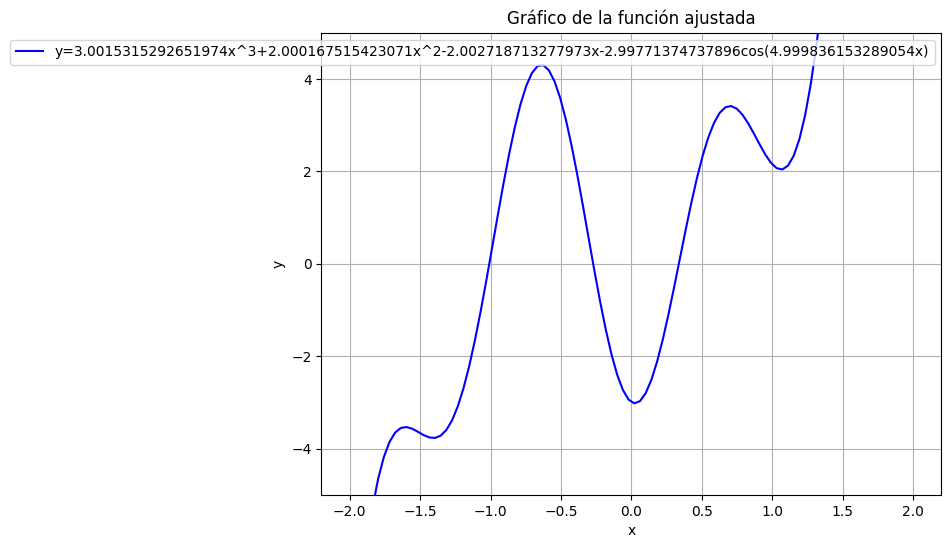

In [3]:
import matplotlib.pyplot as plt
A,B,C,D,E = mejor_individuo
y_values = A * x_values**3 + B * x_values**2 - C * x_values - D * np.cos(E * x_values)

#grafica de reales
plt.figure(figsize=(8, 6))
label11 = f'y={A}x^3+{B}x^2-{C}x-{D}cos({E}x)'
plt.plot(x_values, y_values, label=label11, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5,5)
plt.title('Gráfico de la función ajustada')
plt.legend()
plt.grid(True)

plt.show()


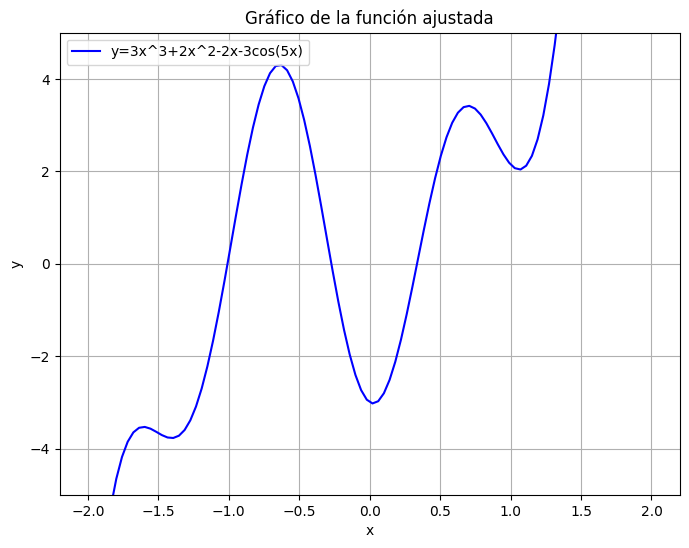

In [4]:
A,B,C,D,E = mejor_individuo_enteros
y_values = A * x_values**3 + B * x_values**2 - C * x_values - D * np.cos(E * x_values)

#grafica de enteros
plt.figure(figsize=(8, 6))
label11 = f'y={A}x^3+{B}x^2-{C}x-{D}cos({E}x)'
plt.plot(x_values, y_values, label=label11, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5,5)
plt.title('Gráfico de la función ajustada')
plt.legend()
plt.grid(True)

plt.show()
